# Assignment3

1. sklearn 패키지를 사용해 로지스틱 회귀모형으로 데이터를 분석해 주세요 
2. 성능지표를 계산하고 이에 대해 해석해 주세요 
   - sklearn : mean accuracy, f1 score 등 다양한 성능지표 계산 
   - confusion matrix : tp, fp, fn, tn 값을 통해 성능지표 계산  
3. 로지스틱 회귀분석은 cutoff 설정 값에 따라 classification의 성능이 달라집니다.      
   해당 데이터셋에 걸맞는 cutoff value를 찾아보고, 이를 기반으로 예측을 진행해 성능을 평가해 주세요.
4. **해석을 상세하게 달아주세요 !**

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np

In [2]:
credit = pd.read_csv("assignment3_creditcard.csv")

In [3]:
credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [4]:
credit['Class'].value_counts()

0    28432
1      246
Name: Class, dtype: int64

전체 경우 대 사기 경우의 비율이 굉장히 작다

## 1. Logistic Regression 

In [5]:
# package import
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
X = credit.drop(['Class'], axis = 1)
y = credit['Class']

In [7]:
#train, test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

In [8]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(21508, 28) (7170, 28) (21508,) (7170,)


train_set, test_set 비율 = 3:1

In [9]:
#Logistic Regression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [10]:
#predict class
y_pred = classifier.predict(X_test)
print(y_pred)
pd.Series(y_pred).value_counts()

[0 0 0 ... 0 0 0]


0    7125
1      45
dtype: int64

원본 데이터 class 분포가 '0'에 편향되있었으므로 예측값 또한 '0'으로 편향되었음을 확인할 수 있다

In [11]:
#[0으로 분류될 확률, 1로 분류될 학률]
classifier.predict_proba(X_test)

array([[9.99150341e-01, 8.49658679e-04],
       [9.99678842e-01, 3.21158487e-04],
       [9.80151409e-01, 1.98485909e-02],
       ...,
       [9.99926536e-01, 7.34644299e-05],
       [9.96021189e-01, 3.97881060e-03],
       [9.99271417e-01, 7.28582810e-04]])

In [12]:
# mean accuracy
classifier.score(X_train, y_train)

0.9976752836153989

입력값과 출력값 비교

In [13]:
prob = [prob[1] for prob in classifier.predict_proba(X_test)] #class 1에 속할 확률

In [14]:
ce_df = {
    'y_test' : y_test, # 실제
    'y_pred' : y_pred, # 예측
    'prob' : prob
}

ce_df = pd.DataFrame(ce_df)

In [15]:
ce_df

,y_test,y_pred,prob
2124,0,0,0.000850
5521,0,0,0.000321
21800,0,0,0.019849
16959,0,0,0.000151
27369,0,0,0.000131
6020,0,0,0.000598
14476,0,0,0.003547
17692,0,0,0.001055
20291,0,0,0.001978
18135,0,0,0.000159


In [16]:
yi = ce_df["y_test"].to_numpy()
pi = ce_df["prob"].to_numpy()

In [17]:
# cross entropy 
-np.sum((yi * np.log(pi) + (1-yi) * np.log(1-pi))) / ce_df.shape[0]

0.007366324274358508

## 2. Metrics Evaluation 

### 1) sklearn 패키지를 이용한 성능 평가지표 계산 

In [18]:
from sklearn import metrics

### 2) confusion matrix를 이용한 성능 평가지표 계산 

In [20]:
metrics.confusion_matrix(y_test, y_pred)

array([[7114,    4],
       [  11,   41]], dtype=int64)

In [19]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(7114, 4, 11, 41)

In [21]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy: ", accuracy)

accuracy:  0.997907949790795


In [22]:
precision = tp / (tp+fp) #True라고 분류한 것 중에서 실제 True인 것의 비율
recall = tp / (tp+fn) #실제 True인 것 중에서 True라고 예측한 것의 비율
specificity = tn / (tn+fp) # 실제 False인 것 중에서 False라고 예측한 것의 비율
f1_score = 2*((precision*recall)/(precision+recall))

In [23]:
print("precision: ", precision)
print("recall: ", recall)
print("specificity: ", specificity)
print("f1_score: ", f1_score)

precision:  0.9111111111111111
recall:  0.7884615384615384
specificity:  0.9994380443944928
f1_score:  0.845360824742268


### 3) cut-off value 찾아보기 
* fpr = fall-out = 1-specificity
* tpr = sensitivity

In [24]:
scores = classifier.predict_proba(X_test)[:,1] #class 1에 속할 확률

In [25]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, scores)

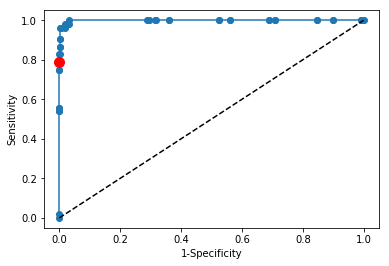

In [28]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-specificity], [recall], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [29]:
# roc curve 아래의 면적 
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, scores)
auc

0.9987842306611625

## 3. 새로운 cutoff value로 모델 예측하기 

In [30]:
optimal_idx = np.argmax(tpr-fpr) #tpr-fpr이 최대가 되는 index 찾기
optimal_threshold = thresholds[optimal_idx] #해당 index를 갖는 cut off가 optimal
optimal_threshold

0.009897646648705717

In [32]:
#새로운 cut off value를 이용해 새롭게 예측
predict_new = np.where(scores > optimal_threshold, 1, 0)

In [33]:
# 새로운 cutoff value로 분류한 confusion matrix 
metrics.confusion_matrix(y_test, predict_new)

array([[6898,  220],
       [   1,   51]], dtype=int64)

In [35]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predict_new).ravel()
(tn, fp, fn, tp)

(6898, 220, 1, 51)

In [36]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy: ", accuracy)

accuracy:  0.9691771269177127


In [37]:
precision = tp / (tp+fp) #True라고 분류한 것 중에서 실제 True인 것의 비율
recall = tp / (tp+fn) #실제 True인 것 중에서 True라고 예측한 것의 비율
specificity = tn / (tn+fp) # 실제 False인 것 중에서 False라고 예측한 것의 비율
f1_score = 2*((precision*recall)/(precision+recall))

In [38]:
print("precision: ", precision)
print("recall: ", recall)
print("specificity: ", specificity)
print("f1_score: ", f1_score)

precision:  0.1881918819188192
recall:  0.9807692307692307
specificity:  0.969092441697106
f1_score:  0.3157894736842105


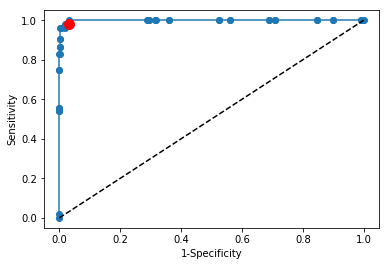

In [57]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-(tn / (fp+tn))], [tp / (fn+tp)], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

#### Q. cutoff value를 바꿔서 나온 결과의 의의는 무엇일까요 ? 

precision이 감소하고 recall 값이 상승했다. 이는 precision과 recall의 trade-off 관계 때문이다.  
recall과 specificity가 높은 값을 갖고 있다. 즉 실제 True인 것을 True라고 분류한 확률과 실제 False인 것을 False라고 분류한 확률이 높다  
cutoff value를 바꾼 모델의 예측에서 recall이 높아진 것을 알 수 있다.